
<div style="border:1px solid black; padding:20px 20px;text-align: justify;text-justify: inter-word">
    <strong>Exercise Session 4 - Local Navigation<br/> Autumn 2020 <br/> Duration : 4 hours (2 in session + 2 at home)</strong><br/><br/>
    <span style="text-decoration:underline;font-weight:bold;">How to use this notebook?</span><br/>
    This notebook is made of text cells and code cells. The code cells have to be <strong>executed</strong> to see the result of the program. To execute a cell, simply select it and click on the "play" button (<span style="font: bold 12px/30px Arial, serif;">&#9658;</span>) in the tool bar just above the notebook, or type <code>shift + enter</code>. It is important to execute the code cells in their order of appearance in the notebook.<br/>
You can make use of the table of contents to navigate easily between sections.
</div>

<br/>

<div style="justify;text-justify: inter-word">
So that you may familiarise with the notebooks and the basic python syntax, the exercises are provided in notebook form and whenever there are any calculations to be made, we encourage you to do them by code. Also, if you want to take notes, we encourage you to use the markdown or Raw NBConvert cells. 
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Goals" data-toc-modified-id="Learning-Goals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning Goals</a></span></li><li><span><a href="#Requirements" data-toc-modified-id="Requirements-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Requirements</a></span></li><li><span><a href="#Proximity-Sensors" data-toc-modified-id="Proximity-Sensors-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Proximity Sensors</a></span><ul class="toc-item"><li><span><a href="#Characterising-the-Proximity-Sensors" data-toc-modified-id="Characterising-the-Proximity-Sensors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Characterising the Proximity Sensors</a></span></li><li><span><a href="#Using-Sensor-Values-and-Displacements-to-Map-the-Environment" data-toc-modified-id="Using-Sensor-Values-and-Displacements-to-Map-the-Environment-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Using Sensor Values and Displacements to Map the Environment</a></span><ul class="toc-item"><li><span><a href="#Creating-a-local-occupancy-grid-based-on-the-individual-sensor-values" data-toc-modified-id="Creating-a-local-occupancy-grid-based-on-the-individual-sensor-values-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Creating a local occupancy grid based on the individual sensor values</a></span></li><li><span><a href="#Creating-the-global-map-provided-the-sensor-values-and-robot-displacements-within-the-map." data-toc-modified-id="Creating-the-global-map-provided-the-sensor-values-and-robot-displacements-within-the-map.-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Creating the global map provided the sensor values and robot displacements within the map.</a></span></li></ul></li></ul></li><li><span><a href="#Local-Navigation-on-Thymio" data-toc-modified-id="Local-Navigation-on-Thymio-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Local Navigation on Thymio</a></span><ul class="toc-item"><li><span><a href="#Moving-Toward-the-Goal" data-toc-modified-id="Moving-Toward-the-Goal-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Moving Toward the Goal</a></span></li><li><span><a href="#Local-Obstacle-Avoidance" data-toc-modified-id="Local-Obstacle-Avoidance-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Local Obstacle Avoidance</a></span></li><li><span><a href="#Potential-Field-Navigation" data-toc-modified-id="Potential-Field-Navigation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Potential Field Navigation</a></span></li></ul></li></ul></div>

---

# Learning Goals


- Proximity sensor analysis and local navigation implementation on Thymio


- Analysing the proximity sensors


- Creating a local occupancy grid and global map from sensor values and displacements (Jupyter notebooks)


- Implementing local navigation on the Thymio  (ASEBA studio) in real time


# Requirements

- Thymio 

- The gradient printed on an A3 paper


![gradient](images/gradient.png)


# Proximity Sensors

## Characterising the Proximity Sensors

Proximity sensors just measure the presence of objects, and are hard to characterise in that very fuzzy function. Consider here the use of proximity sensors as distance sensors for a very well defined situation (facing a white paper). 



***In this context, is it possible to extract the position from the data acquired by the proximity sensor?***


***If yes, define an approximate value of the range, the dynamic range, the update frequency, the precision, the resolution, and the accuracy of this specific distance sensor.***

***Is there cross-talk between the sensors? How can you verify this?***


## Using Sensor Values and Displacements to Map the Environment

The goal of this exercise is two-fold:


- to implement the local occupancy grid around the Thymio robot based on the sensor readings. 


- provided a set of displacements and sensor readings, estimate 

In [1]:
!pip install numpy matplotlib pandas scipy tqdm

You should consider upgrading via the '/Users/laila-mobots/.virtualenvs/venv/bin/python -m pip install --upgrade pip' command.


### Creating a local occupancy grid based on the individual sensor values

Obstacle avoidance algorithms rely on knowing where the obstacles in the environment are. 
The goal of this exercise is to determine the position of obstacles detected by a virtual Thymio's sensors and place them in a local occupancy grid. 

You will have to start by estimating the distance of the different obstacles in the environment using the proximity sensor measurements that are provided. 

Therefore, you need to convert the sensor values into distances and place them in the grid around the robot. As such, you must take into account the geometry of the robot and the position / orientation of the different sensors. 


------------------------------------------------------------------
------------------------------------------------------------------
First we start by loading some of the standard python libraries and others that we will use in the exercise

In [2]:
import os
import sys
import math
from statistics import mean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


sys.path.insert(0, os.path.join(os.getcwd(), 'src'))


from local_occupancy import sensor_measurements, sensor_distances
from local_occupancy import thymio_coords, sensor_pos_from_center, sensor_angles

%matplotlib inline

For this exercise, we are going to give you a list of : 

- fictional sensor values : `sensor_measurements`

- corresponding distance measurements  : `sensor_distances`


As we are going to be giving you quite a few variables in this exercise, we are giving you a function called **`variable_info`**. This function will print the type, content and elements that can be accessed from the variable


In [3]:
def variable_info(variable):
    """
    Provided a variable, prints the type and content of the variable
    """
    print("This variable is a {}".format(type(variable)))
    if type(variable) == np.ndarray:
        print("\n\nThe shape is {}".format(variable.shape))
    print("\n\nThe data contained in the variable is : ")
    print(variable)
    print("\n\nThe elements that can be accessed in the variable are :\n")
    print(dir(variable))
    
variable_info(np.array([1]))

This variable is a <class 'numpy.ndarray'>


The shape is (1,)


The data contained in the variable is : 
[1]


The elements that can be accessed in the variable are :

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne

Let's start easy and plot the sensor_distances w.r.t the sensor measurements. Update the code block below to get the desired output. 


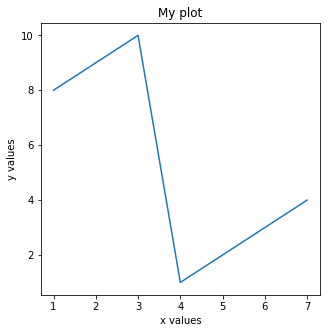

In [4]:
x = [1, 2, 3, 4, 5, 6, 7]
y = [8, 9, 10, 1, 2, 3, 4]

plt.figure(figsize=(5,5))
plt.plot(x, y)
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("My plot")
plt.show()

Now complete the function below that will give you the distance of the different obstacles in the environment based on the proximity sensor measurements. Have a look at the `interp1d` function that scipy has to provide. 

In [5]:
## Interpolation from sensor values to distances in cm
def sensor_val_to_cm_dist(val):
    """
    Returns the distance corresponding to the sensor value based 
    on the sensor characteristics
    :param val: the sensor value that you want to convert to a distance
    :return: corresponding distance in cm
    """
    return val

# Verifying the interpolation
sensor_val_to_cm_dist(4996)

4996

Once you have verified that the function works, the goal is to create the local occupancy grid that takes into account the geometry of the robot. 

This means, we would like it if you plotted the position of the obstacles in the grid surrounding the robot. For this you need the following information :

- The position of each sensor with respect to the center of the robot. This is provided in the variable `sensor_pos_from_center` : a list containing the coordinates of the 7 sensors proximity sensors starting from the top left to the bottom left in clockwise direction. (0,0) corresponds to the center of the robot

- The orientation of each of the sensors, provided under `sensor_angles` : a list containing the angle that each sensor does with respect to the x axis. 

- The position of the comtour of the robot w.r.t its center, provided under `thymio_coords`, for the visualisation of the occupancy grid: a list of coordinates making up the outline of the Thymio robot. (0,0) corresponds to the center of the robot. 


We have provided the prototype of the function and of the plots below. Please update it to get the results shown in the image below with the sensor values provided in the code cell. 

<img src="Images/part1_solution.png" alt="Drawing" style="width: 500px;"/>



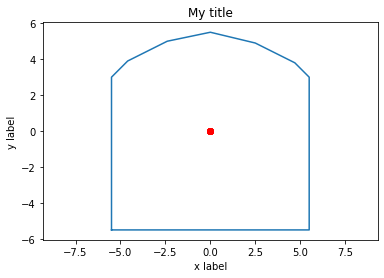

In [6]:
def obstacles_pos_from_sensor_vals(sensor_vals):
    """
    Returns a list containing the position of the obstacles
    w.r.t the center of the Thymio robot. 
    :param sensor_vals: sensor values provided clockwise starting from the top left sensor.
    :return: numpy.array() that contains the position of the different obstacles
    """
    obstacle_positions = [[0,0] for i in range(len(sensor_vals))] #DUMMY VALUES
    
    return np.array(obstacle_positions)

sensor_vals = [1400, 3000, 5000, 500, 0, 5000, 1400]

obstacles_pos = obstacles_pos_from_sensor_vals(sensor_vals)

plt.figure()
plt.title("My title")
plt.xlabel("x label")
plt.ylabel("y label")
plt.plot(thymio_coords[:,0], thymio_coords[:,1])
plt.axis("equal")
plt.scatter(obstacles_pos[:,0], obstacles_pos[:,1], marker="o", color="r")

### Creating the global map provided the sensor values and robot displacements within the map.

Now that you are able to construct the local occupancy grid, the goal is to remember where the obstacles are and create a global map. Here, we give you a set of relative displacements (`rel_dpos`) and corresponding sensor values (`map_sensor_vals`). 

The goal is that you use this information to construct the global map. 



Let's start by constructing a function that rotates a set of coordinates by the given angle. You can test it out on the drawing of the thymio's coordinates to make sure it works. 

In [7]:
def rotate(angle, coords):
    """
    Rotates the coordinates of a matrix by the desired angle
    :param angle: angle in radians by which we want to rotate
    :return: numpy.array() that contains rotated coordinates
    """
    
    return coords #DUMMY VALUE
    

Once you have done that, we can move on to constructing a global map from the relative displacements and corresponding sensor values. 

------
------
One way of solving this problem is to do the following (but it is not the only way so if you prefer adopting another solution or changing any portion of the pseudo-code feel free to do so) :

1. Start by defining the initial position of the robot as the origin of the map (i.e the position x,y,theta = 0, 0, 0)


2. Provided the relative displacements (rel_dpos), compute the absolute position of the robot at each step


3. Compute the local occupancy grid from the sensor values at each step. Use the function that you implemented previously


4. Create the global map from the local occupancy grids by rotating and translating the obstacles found. To do so, for each data point you will have to :
    - Rotate the local occupancy grid and coordinates of the outline of the thymio
    - Translate the local occupancy grid and the coordinates of the outline to the position of the Thymio
    - Store the coordinates in a list

5. Plot on a final figure :
    - the trajectory taken by the robot
    - the outline of the robot at each step
    - the position of the obstacles that were seen by the robot in the global frame

-----
-----

Here is the result you should get : 

<img src="Images/map_creation_solution.png" alt="Drawing" style="width: 500px;"/>


-----
-----
Below is a skeleton which will guide you through the pseudo-code above, but feel free to modify any portion to suit your needs. 

**Steps 1 and 2 : compute the absolute position of the robot at each step**

Let's start by printing the content of the rel_dpos variable which provides the relative displacement at each step. Knowing the content of this variable will help you estimate whether your absolute positions are correct. Of course you could always just compare the plot with the image provided above.

In [8]:
from local_occupancy import map_sensor_vals, rel_dpos

variable_info(rel_dpos)

This variable is a <class 'numpy.ndarray'>


The shape is (40, 3)


The data contained in the variable is : 
[[ 0.         20.          0.        ]
 [ 0.         20.          0.        ]
 [ 0.         20.          0.        ]
 [ 0.         20.          0.        ]
 [ 0.          0.          1.57079633]
 [ 0.         20.          0.        ]
 [ 0.         20.          0.        ]
 [ 0.         20.          0.        ]
 [ 0.         20.          0.        ]
 [ 0.         20.          0.        ]
 [ 0.          0.          1.57079633]
 [ 0.         20.          0.        ]
 [ 0.         20.          0.        ]
 [ 0.          0.          1.57079633]
 [ 0.         20.          0.        ]
 [ 0.         20.          0.        ]
 [ 0.          0.          1.57079633]
 [ 0.         20.          0.        ]
 [ 0.          0.         -1.57079633]
 [ 0.         20.          0.        ]
 [ 0.         20.          0.        ]
 [ 0.          0.         -1.57079633]
 [ 0.         20.          0.    

In [9]:
# Arbitrarily define the initial robot position as the origin of 
# the map


# Provided the relative positions, compute the absolute positions 
# at each step


# Plot the absolute positions and make sure they are coherent with 
# the displacements



**Step 3 : Compute the local occupancy grids for each set of measurements provided**

Compute the list of local occupancy grids at each position. For this, you will need the `map_sensor_vals` variable. 

In [10]:
variable_info(map_sensor_vals)

This variable is a <class 'list'>


The data contained in the variable is : 
[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [3276.75, 3947.08, 4286.0, 3907.68, 3243.2, 0, 0], [0, 0, 0, 0, 2416.2000000000003, 0, 0], [0, 0, 0, 0, 2416.2000000000003, 0, 0], [0, 0, 0, 0, 2416.2000000000003, 0, 0], [0, 0, 0, 0, 2416.2000000000003, 0, 0], [0, 0, 0, 0, 2416.2000000000003, 0, 0], [3276.75, 3947.08, 4286.0, 3907.68, 3243.2, 0, 0], [0, 0, 0, 0, 2416.2000000000003, 4286.0, 4286.0], [0, 0, 0, 0, 2416.2000000000003, 0, 0], [3276.75, 3947.08, 4286.0, 3907.68, 3243.2, 0, 0], [0, 0, 0, 0, 2416.2000000000003, 4286.0, 4286.0], [0, 0, 0, 0, 2416.2000000000003, 0, 0], [3276.75, 3947.08, 4286.0, 3907.68, 3243.2, 0, 0], [0, 0, 0, 0, 0, 4286.0, 4286.0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2413.4700000000003, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2416.2000000000003, 0, 0], [0, 0, 0, 0, 2416.2000000000003, 0, 0], [0, 0, 0, 0, 0, 0, 0], [

In [11]:
# Compute the local occupancy grid from the sensor values at each step


**Steps 4 and 5 : Create the global map from the local occupancy grids by rotating and translating the obstacles found and visualise the result**

Hint : to rotate obstacles try to think back to the rotation matrices you saw in the basics of robotics course. If you have forgotten or not seen them the principle is pretty simple and can be found [here](https://en.wikipedia.org/wiki/Rotation_matrix). To do the dot product, one [function provided by numpy could be helpful](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html).

# Local Navigation on Thymio


Local navigation allows modulating the trajectory to avoid unforeseen, local obstacles. It pushesoften the controller to leave the optimal path to make an avoidance manoeuvre. Once the obstacleis passed, the controller can go back to the optimal path or find a new one. An important issue isto decide when the controller has to start avoiding, and, more difficult, when the obstacle can beconsidered as passed.

We will work with the Thymio placed on a surface that has a gray level gradient. We can consider thatthe darker spot is the goal. This allows, using the ground sensors, to measure the orientation tothe goal.


For this exercise, you should make use of the ``gradient.pdf`` file. 

## Moving Toward the Goal

Implement on Thymio a program that makes it moving toward the goal, as illustrated in the figure below that shows for various positions the path that allows to go to the goal. For this, use the two ground sensors and a simple reactive behaviour.

<br>

![Filename](Images/gotogoal.png)

<br>


## Local Obstacle Avoidance

Put an obstacle on the path, for instance the box of Thymio, as illustrated in the figure below. The Figure illustrates the paths that allow to go to the goal avoiding the obstacle. Implement a state machine with two states, one moving toward the goal like in the previous behaviour, anothermaking obstacle avoidance. Which condition do you choose to decide to change from going towardthe goal to obstacle avoidance behaviour? Which condition do you choose to decide to change backto moving toward the goal?


<br>

![Filename](Images/avoid.png)

<br>



## Potential Field Navigation

Implement the local obstacle avoidance behaviour using the potential field approach.

